> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::


# Puertas cuánticas




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{| #1\rangle \langle #2|} $
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $
$ \newcommand{\bn}{{\bf n}} $

In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
from IPython.display import display,Markdown,Latex
from qiskit.visualization import array_to_latex

La propia palabra cúbit ya incorpora la noción de *bit cuántico*. Un *bit* es una variable  real $a$ que puede tomar valores en $ {\mathbb Z}_2= \{0, 1\}$. Un sistema físico que admita dos estados diferenciados implementa un bit. Por ejemplo un interruptor (encendido/apagado). 

Igualmente, un sistema cuántico con dos niveles de energía diferenciados puede albergar un cúbit.  Vamos a definirlo matemáticamente en este capítulo. En capítulos posteriores veremos dos implementaciones físicas: el espín de un electrón y la polarización de un fotón.




::::::{card} 
<b>Definición</b>:  

^^^

un cúbit es un <i>espacio de Hilbert</i> complejo de dimensión dos $~\Hil \sim {\mathbb C}^2$ 
::::::


Un **cútrit** es un espacio de Hilbert de dimensión tres, $\Hil \sim {\mathbb C}^3$. Un **cúdit** de dimensión $d$.

Ya hemos visto que la forma de trabajar en espacios vectoriales pasa, primeramente, por escoger una base.
La base *ortonormal* que usaremos se denotará por  $B=\{\ket{0},\ket{1}\}$ y se denomina *base computacional*

$$
\braket{0}{0} = \braket{1}{1} = 1 ~~~~~~~~~~\braket{0}{1} = \braket{1}{0} = 0
$$


##  Esfera de Bloch 


Si lo expresamos en la base computacional, un estado    $\ket{u} \in \Hil = \mathbb{C}^2$ será $\ket{u} = a\ket{0} + b\ket{1}$ donde $a$ y $b$ son dos números complejos, es decir cuatro números reales.  

Sin embargo, como cualquier estado cuántico, ha de ser un vector unitario $ \braket{u}{u} = 1$. Esto impone una ecuación $a|^2+|b|^2=1$, lo que nos deja  tres grados de libertad reales. 

Pero uno de ellos es una fase global  $\ket{u} = e^{i\phi}\ket{u}$ que no tiene significado. Por lo que, realmente, necesitamos sólo dos números reales para definir el estado de un cúbit. 


::::::{card} 
<b>Lema</b>:  

^^^
    
El cúbit $\ket{u}$  <i> más general</i> se puede representar, en la base computacional $\{\ket{0},\ket{1}\}$, usando dos números reales (ángulos) $\theta\in [0,\pi)$ y $\varphi\in [0,2\pi)$   

$$
|u\rangle = \cos{\frac{\theta}{2}}\, |0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}\,|1\rangle 
$$

::::::


:::{dropdown} Demostración

Para demostrar el lema escribimos un vector de estado general usando la representación polar para las componentes complejas
    
$$
\begin{array}{rcl}
\ket{u} &=& u_0\ket{0} + u_1\ket{1} \\
&=& a_0 e^{i b_0}\ket{0} + a_1 e^{ib_1}\ket{1}\\
&=& e^{i b_0}\big(a_0 \ket{0} + a_1 e^{i(b_1-b_0)}\ket{1}\big)\\
&\sim & \big( a_0 \ket{0} + a_1 e^{i(b_1-b_0)}\ket{1} \big)
\end{array}
$$
    
donde hemos hecho uso de la irrelevancia de una fase global para descartar $e^{i b_0}$ en la última línea.

Ahora $a_1$ y $a_0$ no son números independientes sino que verifican $a_0^2 + a_1^2 = 0$ para que $\|\ket{u}\|=1$.
Esta ecuación se puede resolver en términos de un ángulo $\theta/2$ tal que
$$
a_0 = \cos\frac{\theta}{2}~~~,~~~ a_1 = \sin\frac{\theta}{2} 
$$
Por su parte, de los números $b_1, b_2$ sólo la diferencia
$$
\varphi = b_1-b_2
$$
es relevante para especificar $\ket{u}  ~~~\rule{3mm}{3mm}$    
:::


 En componentes en la base $Z$ escribimos equivalentemente
 
$$
|u\rangle ~\sim ~~
\begin{bmatrix} \cos\displaystyle\frac{\theta}{2} \\  e^{i\varphi} \sin \displaystyle\frac{\theta}{2} \end{bmatrix}
$$

El rango de $\theta\in [0,\pi)$ y $\varphi\in [0,2\pi)$ permite interpretar estos números reales como *ángulos sobre la esfera unidad*. Dicho de otro modo, podemos representar  cada estado de un cúbit como un *punto* sobre una esfera de radio unidad: la *esfera de Bloch*. 



-  $\theta\in [0,\pi)$ el ángulo *azimutal* se mide desde el eje $Z$. De modo que $\theta=\pi/2$ es el *ecuador 
de la esfera de Bloch*.


-  $\phi\in [0,2\pi)$ el ángulo *polar*  en torno al eje $Z$, medido a partir del plano $XZ$





::::{figure} images/BlochSphere.png
:width: 350px
:align: center
::::


### Vectores en la Esfera de Bloch: visualizaciones


- [Visualizador java](https://javafxpert.github.io/grok-bloch/?fbclid=IwAR1lWfCug1lfTXxXenaJxnsdJh2g3he6lBJmjnjL_Jus0gOHR9u3UuaT7qs)


-  La clase <a href=https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html>statevector</a> en *qiskit* cuenta con varios *visualizadores*.


Esta rutina introduce dos ángulos $\theta\in(0,\pi)$ y $\phi\in(0,2\pi)$ y devuelve el vector de Bloch 

$$
|\psi\rangle = \cos{\frac{\theta}{2}}\, |0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}\,|1\rangle 
$$

In [18]:
theta = 1.9
phi   = 0.8

psi_ket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)
array_to_latex(psi_ket,prefix= '\ket{\psi} = ')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

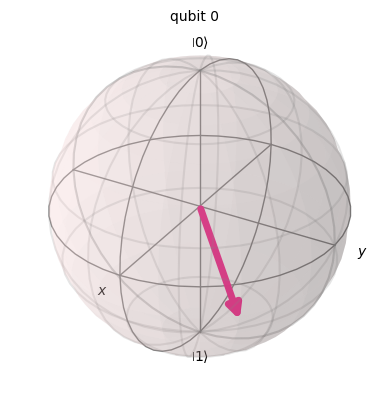

In [19]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex  

display(Statevector(psi_ket).draw('latex',prefix='\ket{\psi} = '))
Statevector(psi_ket).draw('Bloch')

### Bases

Dos vectores diametralmente opuestos en la esfera de Bloch forman una base ortonormal del espacio de un cúbit.
Los denotamos $\{\ket{0}_{\bf n},\ket{1}_{\bf n}\}$.

::::{figure} images/BlochSphere_basis.png
:width: 300px
:align: center
::::




**Base Z**
  
-   $(\theta,\phi) = (0,0) \Rightarrow  \ket{0}_Z = \ket{0}$ 




  
-   $(\theta,\phi) = (\pi,\phi)  \Rightarrow  e^{i\phi}\ket{1}_Z = \ket{1}$

::::{figure} images/Basis_Z.png
:width: 300px
:align: center
::::
  


**Base X**
 
-   $(\theta,\phi) = (\pi/2,0)  ~\Rightarrow~  \frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle \big) =\ket{0}_X \equiv |+\rangle$

  
-   $(\theta,\phi) = (\pi/2,\pi) ~\Rightarrow~  \frac{1}{\sqrt{2}}\big(|0\rangle-|1\rangle \big)=\ket{1}_X \equiv |-\rangle$

::::{figure} images/Basis_X.png
:width: 300px
:align: center
::::


**Base Y**

-   $(\theta,\phi) = (\pi/2,\pi/2) ~\Rightarrow ~|u\rangle =\frac{1}{\sqrt{2}}\big(|0\rangle+i|1\rangle\big) =\ket{0}_Y \equiv  |+i\rangle$



-   $(\theta,\phi) = (\pi/2,3\pi/2) ~\Rightarrow ~|u\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle-i|1\rangle\big) = \ket{1}_Y \equiv  |-i\rangle$


::::{figure} images/Basis_Y.png
:width: 300px
:align: center
::::



<a id='rotesf'></a>
## Rotaciones en la esfera de Bloch

Un operador unitario conserva la norma y, por tanto, lleva un vector a otro de la misma esfera de Bloch 

Esta operación  se puede *visualizar* como una **rotación de un cierto ángulo en torno a algún eje**.

::::{figure} images/BlochSphere2.png
:width: 300px
:align: center
::::


::::::{card} 
<b>Teorema</b>:  

^^^

El operador que efectúa una <i>rotación de ángulo</i>  $\alpha\in [0,2\pi)$ en torno al <i>eje que marca un vector unitario</i>  $\hat{\bf n}$ es el siguiente
 
    
\begin{eqnarray}
R_{\hat{\bf n}}(\alpha)~ = ~\exp\left( -i\frac{\alpha}{2} \hat{\bf n}\cdot \boldsymbol{\sigma} \right) ~=~ 
\cos \frac{\alpha}{2} I - i \sin\frac{\alpha}{2} \hat{\bf n}\cdot\boldsymbol{\sigma} 
\end{eqnarray}

::::::


donde $\boldsymbol{\sigma} = (\sigma_x, \sigma_y, \sigma_z)$ son las matrices de Pauli

$$
\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}~~,~~
\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}~~,~~
\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}~~.~~
$$

::::::{admonition} Nota
:class: note

El sentido de la rotación que produce $R_{\hat{\bf n}}(\alpha)$ en torno al eje $\hat{\bf n}$, viene dado por la <i>regla de la mano derecha</i> o, también, <i>anti-horario</i>. 
::::::


Haciendo la suma explícitamente podemos escribir la matriz unitaria 

$$
\begin{array}{rcl}
R_{\hat{\bf n}}(\alpha)~  ~=~ 
 \begin{bmatrix} \cos \displaystyle\frac{\alpha}{2} - i n_z\sin\frac{\alpha}{2} &\displaystyle (-in_x- n_y)\sin\frac{\alpha}{2} \\ \displaystyle
(-in_x + ny) \sin\frac{\alpha}{2} & \displaystyle \cos \frac{\alpha}{2} + i n_z\sin\frac{\alpha}{2} \end{bmatrix}
\end{array}
$$

### Rotaciones X, Y y Z

- Asociado a rotaciones en torno a los ejes $X$, $Y$ y $Z$ de un ángulo $\alpha$ encontramos las tres puertas siguientes

$$
\begin{array}{rcl}
\hat{\bf n} = (0,0,1) ~~\Rightarrow ~~ R_{z}(\alpha) &=&  \begin{bmatrix} e^{-i\alpha/2}  & 0 \\ 0 & e^{i\alpha/2}  \end{bmatrix}  ~,~\nonumber\\
\rule{0mm}{14mm}
\hat{\bf n} = (0,1,0) ~~\Rightarrow ~~ R_{y}(\alpha) &=&  \begin{bmatrix} \cos \alpha/2  & -\sin \alpha/2 \\   \sin\alpha/2 & \cos\alpha/2 \end{bmatrix}  \nonumber \\
\rule{0mm}{14mm}
\hat{\bf n} = (1,0,0) ~~\Rightarrow ~~ R_{x}(\alpha)  &=&  \begin{bmatrix} \cos\alpha/2  &- i\sin\alpha/2 \\   -i\sin\alpha/2& \cos\alpha/2 \end{bmatrix} \, .\nonumber
\end{array}
$$




### Parametrización de Euler

 Necesitamos *3 parámetros* para especificar una rotación general.
En $R_{\hat{\bf n}}(\theta)$ un parámetro es $\theta$ y otros dos entran  en $\hat{\bf n}$ con 
$  |\hat{\bf n}|=1$.


 La *parametrización de Euler* consiste en una *composición de tres rotaciones* sucesivas en torno a los ejes $z$, después  $y$ y  finalmente $z$ de nuevo:


Multiplicando las matrices asociadas, y extrayendo una fase global, definimos 

$$
 R_z(\phi)R_y(\theta)R_z(\varphi) = e^{-\frac{i}{2}(\phi + \varphi)}U(\theta,\phi,\varphi)  
$$

Los *ángulos de Euler* son $\theta,\phi $ y $\varphi$, 


#### Rotación general

$$
U(\theta,\phi,\varphi)=\begin{bmatrix}   \cos \displaystyle\frac{\theta}{2}  & - e^{i\varphi} \sin\displaystyle\frac{\theta}{2}  \\ 
\rule{0mm}{4mm} e^{i\phi} \sin \displaystyle\frac{\theta}{2} &e^{i(\varphi+\phi)} \cos \displaystyle\frac{\theta}{2} \end{bmatrix}
$$



Es evidente que la acción de este operador sobre la base  $\{\ket{0},\ket{1}\}$ 
una base alineada con el eje $(\theta,\phi)$


$$
U(\theta,\phi,\varphi)\begin{bmatrix} 1\\0\end{bmatrix} = \begin{bmatrix} \cos\displaystyle\frac{\theta}{2}\\ e^{i\phi} \sin \displaystyle \frac{\theta}{2} \end{bmatrix} ~~~~~~,~~~~~~~
U(\theta,\phi,\varphi)\begin{bmatrix} 0\\1\end{bmatrix} = \begin{bmatrix} -e^{i\varphi}\sin\displaystyle\frac{\theta}{2}\\ e^{i(\varphi + \phi)} \cos \displaystyle \frac{\theta}{2} \end{bmatrix} 
$$



<a id='puertsimp'></a>
## Puertas Simples


Por puertas simples entendemos un conjunto de *operadores unitarios* que se utilizan con frecuencia en la computación cuántica. Vamos a ver las puertas simples sobre 1 cúbit

### Puerta de fase 

- $P_\alpha = P(\alpha)$ con $\alpha \in [0,2\pi)$

$$
P(\alpha)= \begin{bmatrix}
1 & 0 \\ 0 & e^{i\alpha} 
\end{bmatrix}  =  \ketbra{0}{0} + e^{i\alpha}\ketbra{1}{1}
$$

es unitaria para todo $\alpha$ como se comprueba fácilmente. 
Aplicada a un estado de cúbit genérico 

$$
P(\alpha) \ket{u} =  \begin{bmatrix} 1 & 0 \\ 0 & e^{i\alpha} \end{bmatrix}
\begin{bmatrix} \cos\theta \\ \sin\theta e^{i\phi} \end{bmatrix} = \begin{bmatrix} \cos\theta \\ \sin\theta e^{i(\phi+\alpha)} 
\end{bmatrix}= \ket{v}
$$


El efecto de este operador es rotar cualquier cúbit en torno al eje Z un ángulo $\alpha$. Comprobamos que está relacionada con $R_z(\alpha)$


$$
P(\alpha) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\alpha} \end{bmatrix} = 
\begin{bmatrix} e^{i\alpha/2} & 0 \\ 0 & e^{i\alpha/2} \end{bmatrix} 
\begin{bmatrix} e^{-i\alpha/2} & 0 \\ 0 & e^{i\alpha/2} \end{bmatrix}   \equiv e^{i\alpha/2} R_z(\alpha)
$$


La fase global es trivial. Por tanto los dos operadores $P(\alpha)$ y $R_Z(\alpha)$ son equivalentes y producen el mismo efecto sobre la esfera de Bloch.



- $K_\alpha = K(\alpha)$


realmente es una fase trivial, pero a veces se utiliza

$$
K(\alpha)= e^{i\alpha} \begin{bmatrix}
1 & 0 \\ 0 & 1 
\end{bmatrix} =  e^{i\alpha}\left(\rule{0mm}{4mm} \ketbra{0}{0} + \ketbra{1}{1} \right) = e^{i\alpha} I 
$$

#### Puertas Discretas

Hay una serie de rotaciones discretas que forman un conjunto de puertas elementales de gran utilidad


- $X,Y,Z$

$$
\begin{array}{rcl}
i R_{\hat{\bf x}}(\pi) &=&   \begin{bmatrix}0&1\\1&0\end{bmatrix}   ~= ~ X  \\
\\
i R_{\hat{\bf y}}(\pi) &=&  \begin{bmatrix}0&-i\\i&0\end{bmatrix}    ~= ~ Y \\
\\
i R_{\hat{\bf z}}(\pi) &=&   \begin{bmatrix}1&0\\0&-1\end{bmatrix} ~= ~ Z 
\end{array}
$$



-  $S,T$

Cualquier potencia  de un operador unitario $U$ es otro operador unitario $U^\alpha$.
Así obtenemos


$$
\begin{array}{rcl}
S = Z^{1/2} &=&  \begin{bmatrix}1&0\\0&i\end{bmatrix}=\begin{bmatrix}1&0\\0&e^{i\pi/2}\end{bmatrix}  \\
&& \\
T  = Z^{1/4} &=&  \begin{bmatrix}1&0\\0&e^{i\pi/4}\end{bmatrix} 
\end{array}
$$

- $H$   

La puerta de Hadamard, $H$, es la primera puerta *genuinamente cuántica* en el sentido de que lleva un estado de la base a una superposición coherente

$$
\begin{array}{rcl}
H \ket{0} &=& \frac{1}{\sqrt{2}}\left(\rule{0mm}{4mm}\ket{0} + \ket{1}\right) =\ket{+}   \\
H \ket{1} &=& \frac{1}{\sqrt{2}}\left(\rule{0mm}{4mm}\ket{0} - \ket{1}\right) =\ket{-} 
\end{array}
$$

Podemos escribir este operador en la base canónica $H = H_{ij}\ketbra{i}{j}$

$$
\begin{array}{rcl}
H &=&  \ket{+}\bra{0} +  \ket{-}\bra{1} \\ \rule{0mm}{6mm}
&=& \frac{1}{\sqrt{2}}(\ketbra{0}{0} + \ketbra{1}{0} + \ketbra{0}{1} - \ketbra{1}{1})
\end{array}
$$


 De aquí obtenemos la representación matricial  

$$
H_{ij}   =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1& 1 \\ 1 & -1 \end{bmatrix} 
$$


::::::{admonition} Nota
:class: note


en cálculos posteriores encontraremos muy útil la siguiente representación de la acción de $H$

$$
H \ket{x} =\frac{1}{\sqrt{2}} \sum_{y=0,1} (-1)^{ x  y} \ket{y}
$$
::::::



Como cualquier puerta, la acción de $H$ puede visualizarse como una rotación en la esfera de Bloch $H$ de $\pi$ radianes en torno a un eje diagonal situado a 45$^\circ$ entre el eje $x$ 
y el eje $y$. Esta rotación permuta los ejes $x$ y $z$ y cambia de sentido el eje $y$.

$$
\begin{array}{rcl}
\hat{\bf n} = \frac{1}{\sqrt{2}}(1,0,1) ~~~~~ \Rightarrow ~~~~~ R_{\hat{\bf n}}(\pi) &=&-i\frac{1}{\sqrt{2}} \begin{bmatrix} 1  & 1 \\ 1 & -1  \end{bmatrix} =-i H \sim H\nonumber\\
\end{array}
$$


Como toda rotación de $\alpha = \pi/2$, una segunda aplicación da lugar a la identidad

$$
H^2 = I
$$

<a id='circcuant'></a>
## Circuitos Cuánticos

Un circuito cuántico representa la acción de un operador sobre un estado inicial $\ket{0}$.  Es decir

$$
U:\ket{0} \to  \ket{\psi} = U\ket{0}
$$
se representa graficamente en la forma 
::::{figure} images/circuito_basico.png
:width: 250px
:align: center
::::

Cuando el operador $U$ es una <i>composición de puertas</i>, por ejemplo que $U = TH$, el orden en el que aparecen en el circuito es el inverso


::::{figure} images/circuito_basico_2.png
:width: 300px
:align: center
::::


:::::{tab-set}
::::{tab-item} Qibo
```python

#from qibo import Circuit, gates
from qibo.models.circuit import Circuit,gates
qc = Circuit(1)

qc.add(gates.H(0))
qc.add(gates.T(0))

#print(qc.draw())

tQ.draw_qibo_circuit_mpl(qc)
```
::::
::::{tab-item} Qiskit
```python

from qiskit import  QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector


qr = QuantumRegister(1) #define el registo cuántico
qc = QuantumCircuit(qr) #crea un circuito

'añade puertas' 
qc.h(0)
qc.t(0)


# qc.u(theta,phi,lambda,quantum register)  https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html
#qc.u(np.pi/4,np.pi/2,0,0)
display(qc.draw(output='mpl'))

#Statevector(qc).draw('Bloch')
```
::::
:::::


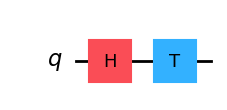

In [2]:
'''Qibo_code_cell'''

#from qibo import Circuit, gates
from qibo.models.circuit import Circuit,gates
qc = Circuit(1)

qc.add(gates.H(0))
qc.add(gates.T(0))

#print(qc.draw())

tQ.draw_qibo_circuit_mpl(qc)

 La concatenación de puertas se corresponde con la *composición de operadores*, es decir, con la *multiplicación de las matrices* asociadas. 


#### Matriz de un circuito

Εl circuito anterior representa el operador unitario $U$ al que le corresponde la matriz obtenida por multiplicación

$$
U = T H ~~~\to ~~~ U_{ij} = \begin{bmatrix}1&0\\0&e^{i\pi/4}\end{bmatrix} \frac{1}{\sqrt{2}} \begin{bmatrix} 1& 1 \\ 1 & -1 \end{bmatrix}  = 
\frac{1}{\sqrt{2}} \begin{bmatrix} 1& 1 \\ e^{i\pi/4} & -e^{i\pi/4} \end{bmatrix} 
$$

Podemos extraer el operador asociado a un circuito.

In [8]:
from qiskit.quantum_info import Operator
result = Operator(qc).data

from qiskit.visualization import array_to_latex
array_to_latex(result,prefix='U = ')

<IPython.core.display.Latex object>

#### Simulador de estado

La descomposición en puertas nos permite visualizar la acción del operador sobre el estado de referencia $\ket{0}$ 

- el operador $H$ lleva el vector $\ket{0}$ al vector $\ket{+}$ sobre el eje $x$.  

- posterioremente, $T$ es una rotación de ángulo $\pi/4$ en torno al eje $z$.

El resultado será un vector en el plano ecuatorial en la diagonal entre los ejes $x$ e $y$.
Podemos visualizar esto usando un simulador de vector de estado.

<IPython.core.display.Latex object>

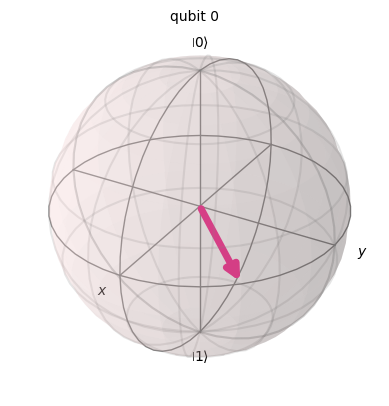

In [9]:
from qiskit.quantum_info import Statevector
statevector = Statevector(qc)

display(statevector.draw('latex',prefix='\ket{\psi} = '))

# alternative wat to plot the state vector on the Bloch sphere
statevector.draw('Bloch')